# Comparing FFNN with Linear Regression Performance

In this notebook, we will compare the performance of a feedforward neural network with ridge regression for approximating 3 different functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from feedforward_nn import NeuralNetwork
from regression_cost_funcs import OLSCost, RidgeCost
from gradient_descent import GradientDescent

from sklearn.model_selection import train_test_split

## Linear function

First, we will consider the function 
$$f(x, y) = x + 2y.$$
We generate points $(x_i, y_i) \in [0,1] \times [0,1]$, and let our dependent variable be $z_i = f(x_i, y_i) + \epsilon_i$ for $\epsilon_i \sim N(0, \sigma^2)$.

In [2]:
from data_generation import linear_function, generate_data_linear

In [3]:
N = 50
sigma2 = 0.1
seed = 562

X, z, z_true = generate_data_linear(N, sigma2, seed)

# Split into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=seed)

We first analyze approximate using linear gradient descent + linear regression

In [24]:
def gradient_descent_execution(X, w0, z, model, max_iter = 200):
    batch_size = 10
    eta = 0.01
    store_extra = True

    gd = GradientDescent(batch_size=batch_size, store_extra=store_extra)
    w = gd.train(X, w0, z, model, eta, max_iter)
    return w, gd

In [5]:
ols = OLSCost()
w0 = np.zeros((2, 1))
w, gd = gradient_descent_execution(X_train, w0, z_train, ols)

true_coefficients = [1, 2]
print("Estimated coefficients:", *w.flatten())
print("True coefficients:", *true_coefficients)
print("Train cost:", gd.costs[-1])
print("Test cost:", ols.cost(X_test, w, z_test))

Estimated coefficients: 1.1842771262917122 1.8820610863843676
True coefficients: 1 2
Train cost: 0.009838080677997274
Test cost: 0.007058050744097229


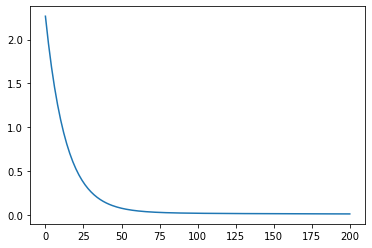

In [6]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

Next, we repeat the analysis for a neural network with 2 hidden layers consisting of 2 nodes.

In [7]:
layers = [2, 4, 4, 4, 1]
nn = NeuralNetwork(layers, activation="sigmoid", output_activation="linear", regularization=0)
w0 = nn.wb()
w, gd = gradient_descent_execution(X_train, w0, z_train, nn)

print("Train cost:", gd.costs[-1])
print("Test cost:", nn.cost(X_test, w, z_test))

Train cost: 0.4552947840748775
Test cost: 0.5755323974511742


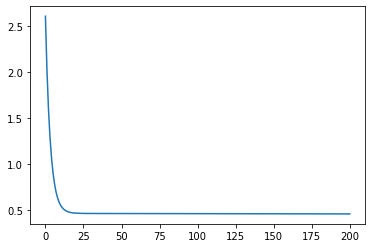

In [8]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

## Franke Function

We repeat a similar analysis for the Franke Function

In [9]:
# TODO

## Non-linear function: XOR

In [10]:
from data_generation import generate_xor_data

In [11]:
# Generate XOR data
N = 40
seed = 562

X, z = generate_xor_data()

We approximate the binary XOR with OLS

In [14]:
ols = OLSCost()
w0 = np.zeros((2, 1))
w, gd = gradient_descent_execution(X, w0, z, ols)

print("Estimated coefficients:", *w.flatten())
print("Train cost:", gd.costs[-1])

Estimated coefficients: 0.31711056954050326 0.31711056954050326
Train cost: 0.33372810043095036


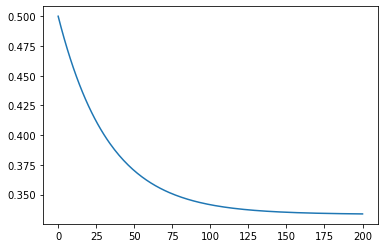

In [15]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

In [17]:
# Print predictions
preds = ols.predict(X, w)
for i in range(len(preds)):
    print(preds[i], z[i])

[0.63422114] [0]
[0.31711057] [1]
[0.31711057] [1]
[0.] [0]


Next, we approximate it with a simple neural network

In [57]:
layers = [2, 2, 2, 2, 1]
nn = NeuralNetwork(layers, activation="relu", output_activation="sigmoid", regularization=0)

w0 = nn.wb()
w, gd = gradient_descent_execution(X, w0, z, nn, max_iter=2000) # Note the increased number of epochs

print("Cost:", gd.costs[-1])

Cost: 0.2500000554100371


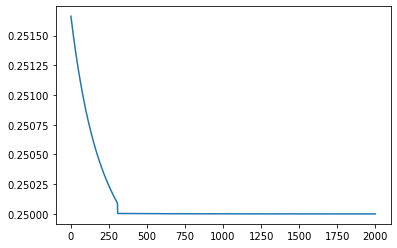

In [58]:
# Plot the cost function
plt.plot(gd.costs)
plt.show()

In [59]:
# Print predictions
preds = nn.predict(X, w)
for i in range(len(preds)):
    print(preds[i], z[i])

[0.50023539] [0]
[0.50023539] [1]
[0.50023539] [1]
[0.50023539] [0]
